# PROBLEM --1 FOR SPARKLING DATASET

# Importing Necessary Libraries:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
# Reading data 
sparkling = pd.read_csv(r'C:\Users\abhay\Downloads\Sparkling.csv')

In [3]:
# chceking head of dataset
sparkling.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
#Check data types of the dataset
sparkling.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
# We are providing inputs to tell pandas that we are trying to work with time series
sparkling = pd.read_csv(r'C:\Users\abhay\Downloads\Sparkling.csv', parse_dates = ['YearMonth'])

In [6]:
#Check data types of the dataset after parsing
sparkling.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [7]:
# It is recommended that we make our time series reference as the index
sparkling = pd.read_csv(r'C:\Users\abhay\Downloads\Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
# checking head of data
sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [9]:
# checking for null values in the dataset
sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [10]:
# checking shape of data
sparkling.shape

(187, 1)

In [11]:
# checking info of data
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [12]:
# chceking description of data
sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


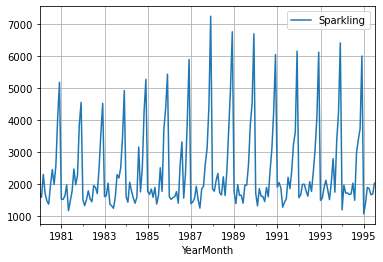

In [13]:
# plotting the time series data
sparkling.plot();
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

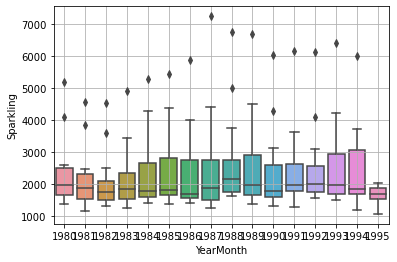

In [14]:
# plotting yearly box plot
import seaborn as sns
sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling'])
plt.grid();

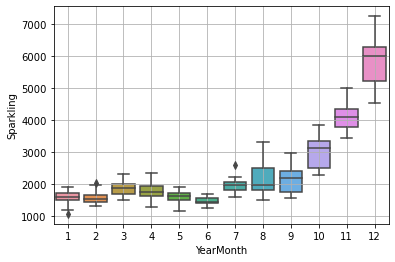

In [15]:
# plotting monthly boxplot
sns.boxplot(x = sparkling.index.month,y = sparkling['Sparkling'])
plt.grid();

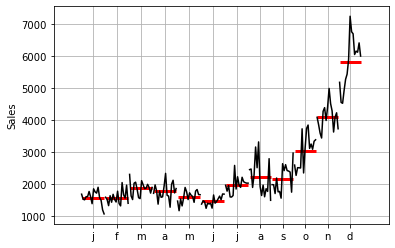

In [16]:
# Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.
from statsmodels.graphics.tsaplots import month_plot

month_plot(sparkling['Sparkling'],ylabel='Sales')
plt.grid();

In [17]:
# Plot a graph of monthly Sales across years
monthly_sales_across_years = pd.pivot_table(sparkling, values = 'Sparkling', columns = sparkling.index.month, index = sparkling.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


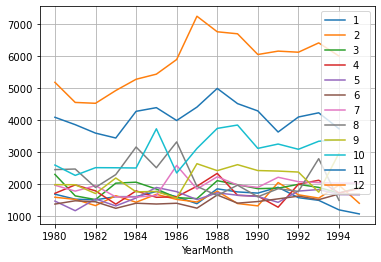

In [18]:
# Plot a graph of monthly Sales across years
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

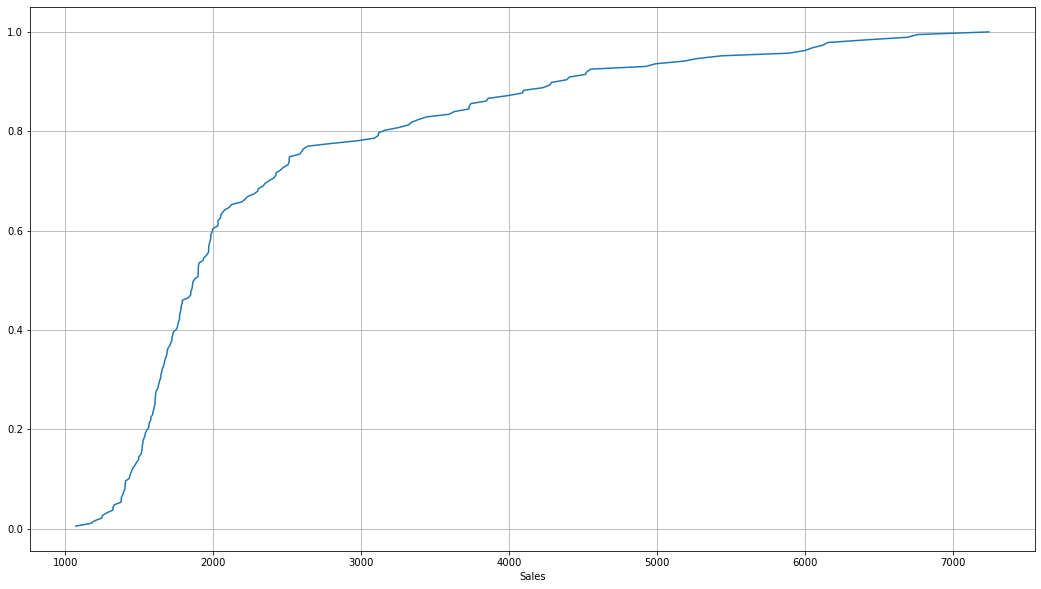

In [19]:
# Plot the Empirical Cumulative Distribution
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 10))
cdf = ECDF(sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

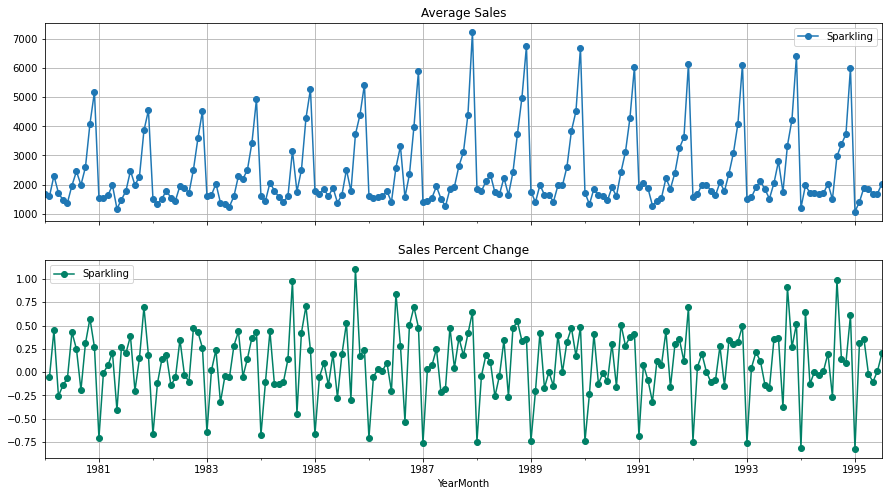

In [20]:
# Plot the average Sales per month and the month on month percentage change of Sales.
# group by date and get average RetailSales, and precent change
average    = sparkling.groupby(sparkling.index)["Sparkling"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

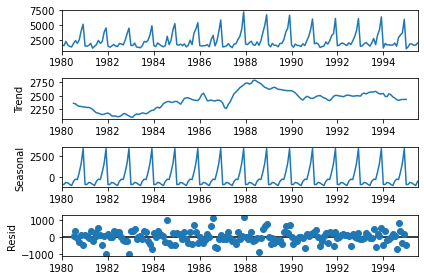

In [21]:
#Decompose the time series additively
sparkling_add_decompose = seasonal_decompose(sparkling, model = 'additive', period = 12)
sparkling_add_decompose.plot()
plt.show()

In [22]:
# getting trend, seasonal and residual components of data
trend = sparkling_add_decompose.trend
seasonality = sparkling_add_decompose.seasonal
residual = sparkling_add_decompose.resid

In [23]:
# printing the components of data
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [24]:
# chceking for only trend and residual-- no seasonality
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
1980-11-01    2411.932821
1980-12-01    1792.016154
dtype: float64

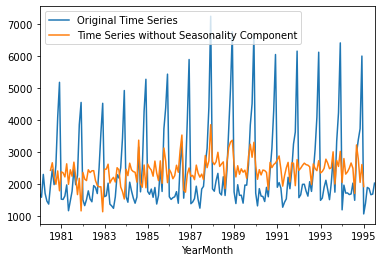

In [25]:
sparkling.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

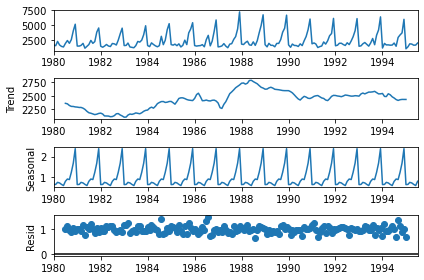

In [26]:
#Decompose the time series multiplicativly
sparkling_mul_decompose = seasonal_decompose(sparkling, model = 'multiplicative', period = 12)
sparkling_mul_decompose.plot()
plt.show()

In [27]:
# getting decomposed components of data
trend = sparkling_mul_decompose.trend
seasonality = sparkling_mul_decompose.seasonal
residual = sparkling_mul_decompose.resid

In [28]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [29]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
1980-11-01    2303.092089
1980-12-01    2294.738436
dtype: float64

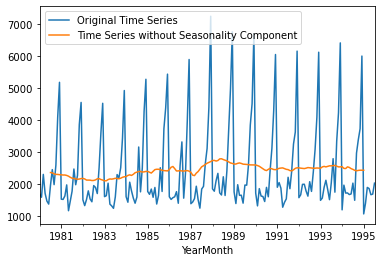

In [30]:
sparkling.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# 3. Split the data into training and test. The test data should start in 1991.

In [31]:
# plitting data into train and test set
train = sparkling[sparkling.index<'1991'] 
test = sparkling[sparkling.index>='1991']

In [32]:
# checking shape of train and test set
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


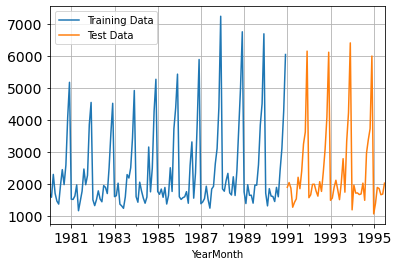

In [33]:
# plotting train and test set
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# > Building Various Exponential Smoothing Models

In [34]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

SES - ETS(A, N, N) - Simple Exponential Smoothing

In [35]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [37]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.687529
1991-02-01    2804.687529
1991-03-01    2804.687529
1991-04-01    2804.687529
1991-05-01    2804.687529
1991-06-01    2804.687529
1991-07-01    2804.687529
1991-08-01    2804.687529
1991-09-01    2804.687529
1991-10-01    2804.687529
1991-11-01    2804.687529
1991-12-01    2804.687529
1992-01-01    2804.687529
1992-02-01    2804.687529
1992-03-01    2804.687529
1992-04-01    2804.687529
1992-05-01    2804.687529
1992-06-01    2804.687529
1992-07-01    2804.687529
1992-08-01    2804.687529
1992-09-01    2804.687529
1992-10-01    2804.687529
1992-11-01    2804.687529
1992-12-01    2804.687529
1993-01-01    2804.687529
1993-02-01    2804.687529
1993-03-01    2804.687529
1993-04-01    2804.687529
1993-05-01    2804.687529
1993-06-01    2804.687529
1993-07-01    2804.687529
1993-08-01    2804.687529
1993-09-01    2804.687529
1993-10-01    2804.687529
1993-11-01    2804.687529
1993-12-01    2804.687529
1994-01-01    2804.687529
1994-02-01    2804.687529
1994-03-01  

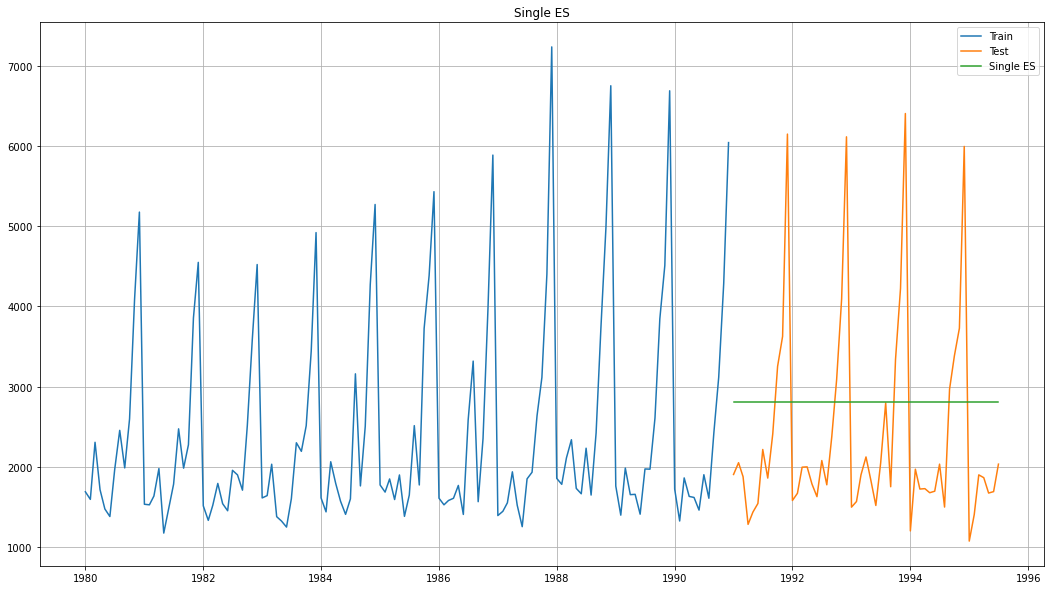

In [39]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')

plt.legend(loc='best')
plt.grid()
plt.title('Single ES');

In [40]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0121443910186
SES RMSE (calculated using statsmodels): 1338.0121443910189


In [41]:
# storing RMSE values in a dataframe
resultsDf1 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Single ES'])
resultsDf1

,Test RMSE
Single ES,1338.012144


Holt - ETS(A, A, N) - Holt's linear method

In [42]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [43]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5330.501799
1991-02-01    5359.520204
1991-03-01    5388.538609
1991-04-01    5417.557013
1991-05-01    5446.575418
1991-06-01    5475.593823
1991-07-01    5504.612228
1991-08-01    5533.630633
1991-09-01    5562.649038
1991-10-01    5591.667443
1991-11-01    5620.685847
1991-12-01    5649.704252
1992-01-01    5678.722657
1992-02-01    5707.741062
1992-03-01    5736.759467
1992-04-01    5765.777872
1992-05-01    5794.796277
1992-06-01    5823.814682
1992-07-01    5852.833086
1992-08-01    5881.851491
1992-09-01    5910.869896
1992-10-01    5939.888301
1992-11-01    5968.906706
1992-12-01    5997.925111
1993-01-01    6026.943516
1993-02-01    6055.961920
1993-03-01    6084.980325
1993-04-01    6113.998730
1993-05-01    6143.017135
1993-06-01    6172.035540
1993-07-01    6201.053945
1993-08-01    6230.072350
1993-09-01    6259.090754
1993-10-01    6288.109159
1993-11-01    6317.127564
1993-12-01    6346.145969
1994-01-01    6375.164374
1994-02-01    6404.182779
1994-03-01  

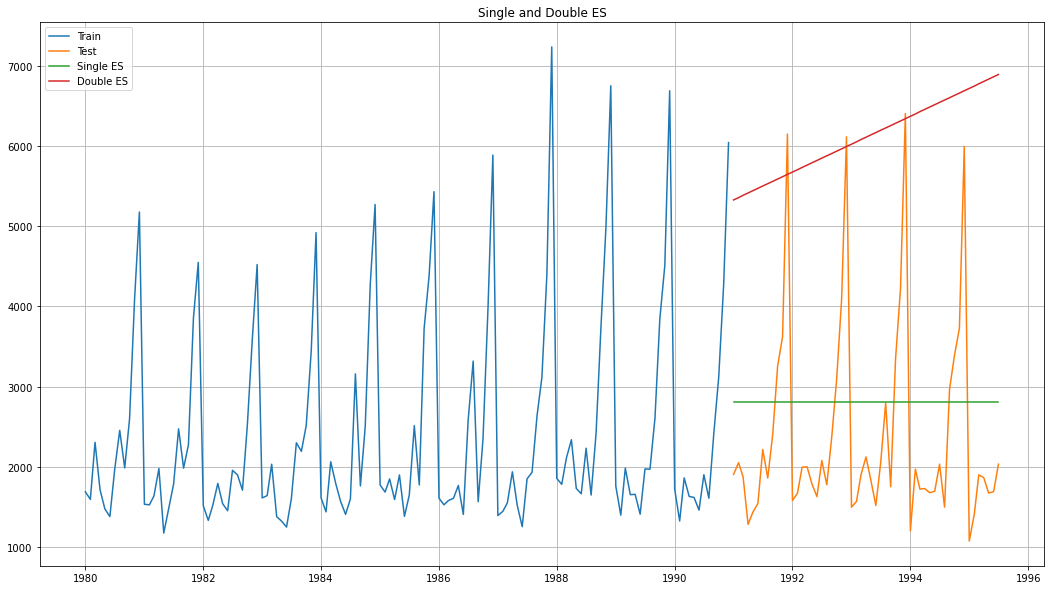

In [44]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')

plt.legend(loc='best')
plt.grid()
plt.title('Single and Double ES');

In [45]:
# getting RMSE value
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3949.993290409098


In [46]:
# storing RMSE values in a dataframe
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Double ES'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,1338.012144
Double ES,3949.993290


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive

In [47]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10005373820823961, 'smoothing_trend': 0.010034490652580457, 'smoothing_seasonal': 0.5095957543425532, 'damping_trend': nan, 'initial_level': 2364.584774604334, 'initial_trend': -0.016752880078245408, 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
       -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
       -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1509.969093
1991-02-01    1205.343244
1991-03-01    1702.386113
1991-04-01    1548.514691
1991-05-01    1467.824074
1991-06-01    1287.109239
1991-07-01    1804.027662
1991-08-01    1646.339830
1991-09-01    2326.596637
1991-10-01    3228.612283
1991-11-01    4303.269444
1991-12-01    6460.680111
1992-01-01    1505.580741
1992-02-01    1200.954892
1992-03-01    1697.997760
1992-04-01    1544.126339
1992-05-01    1463.435722
1992-06-01    1282.720887
1992-07-01    1799.639310
1992-08-01    1641.951478
1992-09-01    2322.208285
1992-10-01    3224.223931
1992-11-01    4298.881092
1992-12-01    6456.291759
1993-01-01    1501.192388
1993-02-01    1196.566540
1993-03-01    1693.609408
1993-04-01    1539.737987
1993-05-01    1459.047370
1993-06-01    1278.332535
1993-07-01    1795.250957
1993-08-01    1637.563125
1993-09-01    2317.819933
1993-10-01    3219.835579
1993-11-01    4294.492739
1993-12-01    6451.903407
1994-01-01    1496.804036
1994-02-01    1192.178188
1994-03-01  

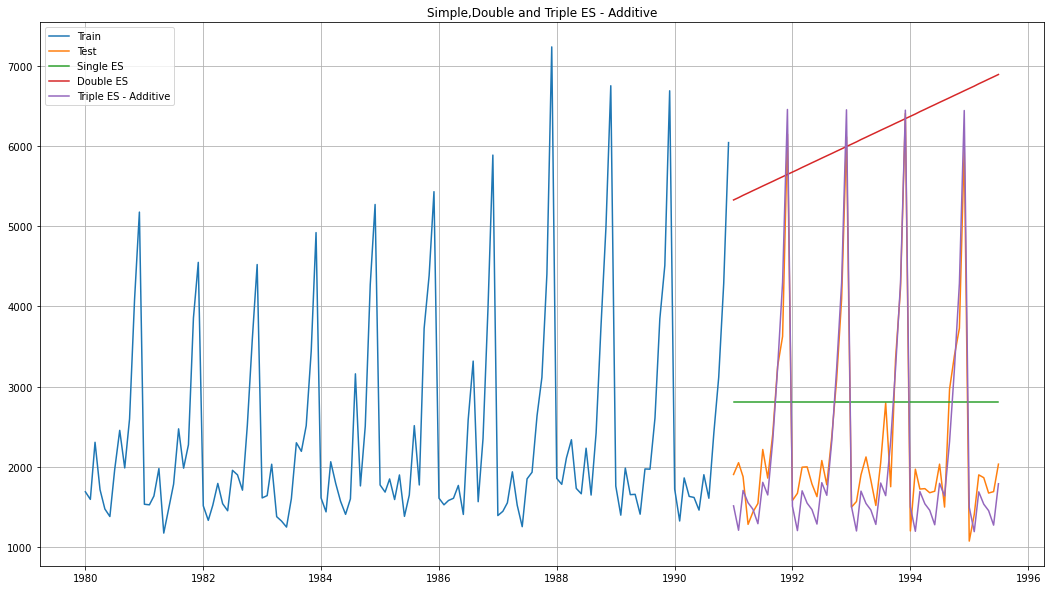

In [49]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')
plt.plot(TES_predict, label='Triple ES - Additive')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple ES - Additive');

In [50]:
# getting RMSE value
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 379.6956857387101


In [51]:
# storing RMSE value in a dataframe
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Triple ES - Additive'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,1338.012144
Double ES,3949.993290
Triple ES - Additive,379.695686


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method -- Multiplicative

In [52]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11194572287706502, 'smoothing_trend': 0.04979454913988668, 'smoothing_seasonal': 0.3616765678435302, 'damping_trend': nan, 'initial_level': 2356.340229937152, 'initial_trend': -10.519480221963526, 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
       0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
       1.8820382 , 2.38194187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1586.782642
1991-02-01    1355.896477
1991-03-01    1762.095344
1991-04-01    1655.471900
1991-05-01    1541.320914
1991-06-01    1354.477040
1991-07-01    1853.306666
1991-08-01    1820.010020
1991-09-01    2275.925030
1991-10-01    3120.245508
1991-11-01    4126.116727
1991-12-01    5885.056602
1992-01-01    1536.931357
1992-02-01    1313.187030
1992-03-01    1706.444942
1992-04-01    1603.050911
1992-05-01    1492.385418
1992-06-01    1311.359584
1992-07-01    1794.152902
1992-08-01    1761.764092
1992-09-01    2202.893649
1992-10-01    3019.852559
1992-11-01    3993.003270
1992-12-01    5694.685845
1993-01-01    1487.080071
1993-02-01    1270.477583
1993-03-01    1650.794539
1993-04-01    1550.629921
1993-05-01    1443.449922
1993-06-01    1268.242128
1993-07-01    1734.999138
1993-08-01    1703.518165
1993-09-01    2129.862267
1993-10-01    2919.459610
1993-11-01    3859.889814
1993-12-01    5504.315087
1994-01-01    1437.228785
1994-02-01    1227.768135
1994-03-01  

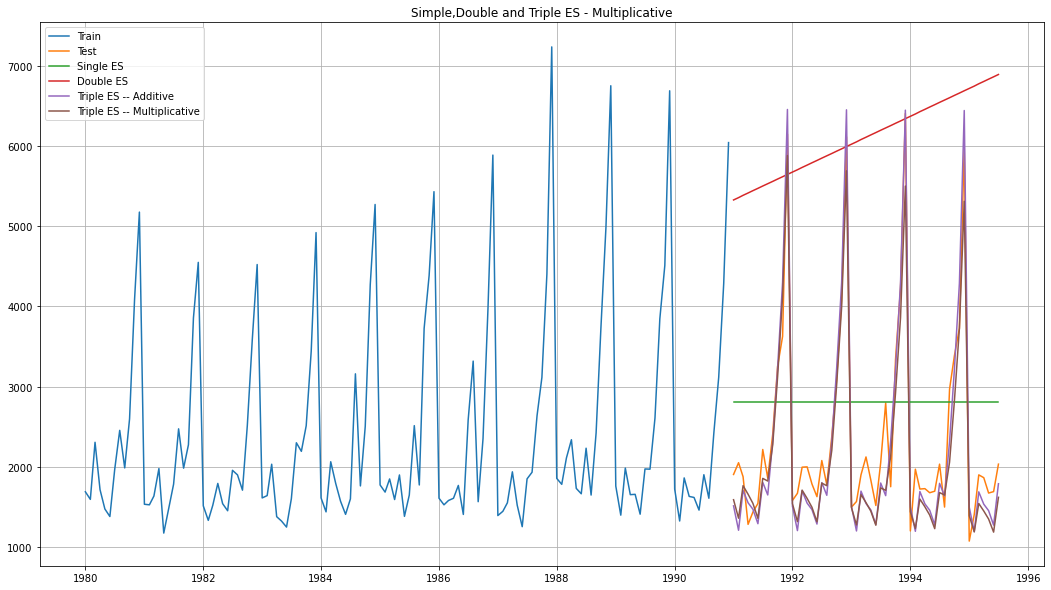

In [54]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')
plt.plot(TES_predict, label='Triple ES -- Additive')
plt.plot(TES_predict_am, label='Triple ES -- Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple ES - Multiplicative');

In [55]:
# getting RMSE value
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 406.51016963157673


In [56]:
# storing RMSE value in a dataframe
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Triple ES - Multiplicative'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,1338.012144
Double ES,3949.993290
Triple ES - Additive,379.695686
Triple ES - Multiplicative,406.510170


Building Linear Regression

In [57]:
print(sparkling.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [58]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [59]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [60]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

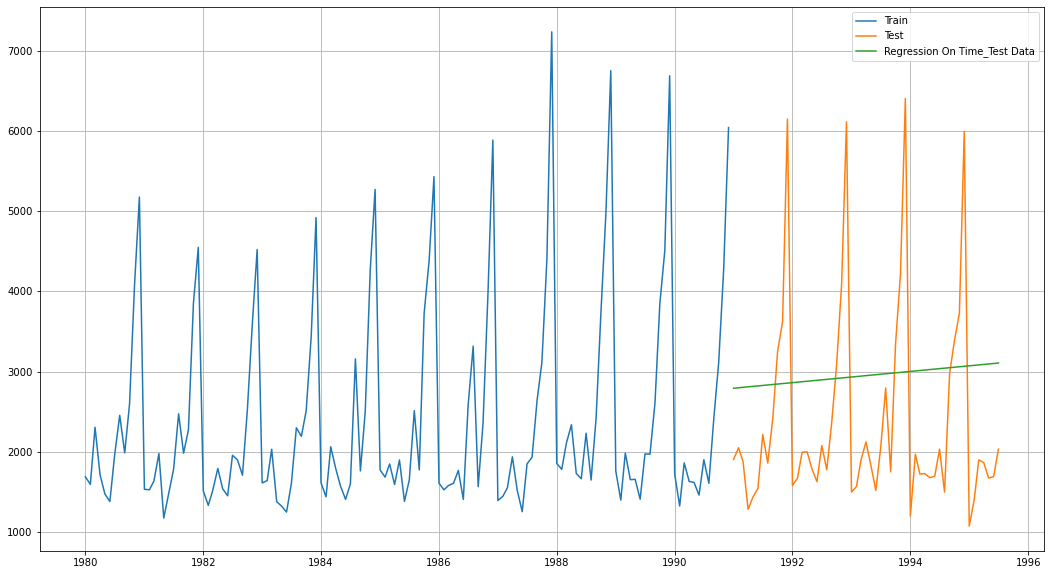

In [64]:
plt.figure(figsize = (18, 10))
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [65]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [66]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf2

,Test RMSE
RegressionOnTime,1389.135175


Building Naive Model

In [67]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [68]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

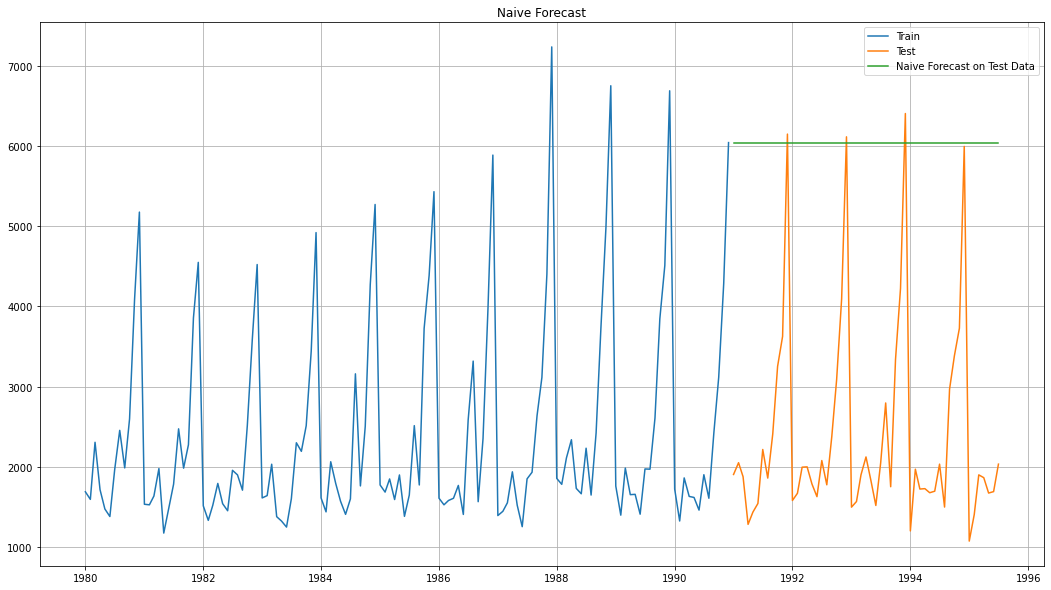

In [69]:
plt.figure(figsize = (18, 10))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [70]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [71]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_2])
resultsDf2

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


Building Simple Average Model

In [72]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [73]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


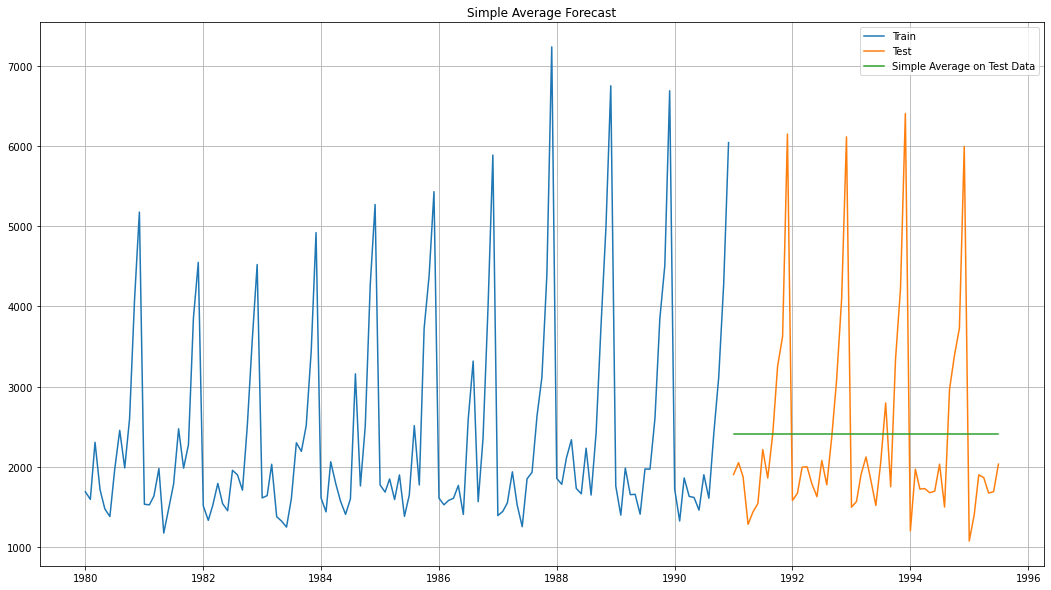

In [74]:
plt.figure(figsize = (18, 10))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [75]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [76]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_3])
resultsDf2

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


Building Moving Average(MA) Model

In [77]:
MovingAverage = sparkling.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [78]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


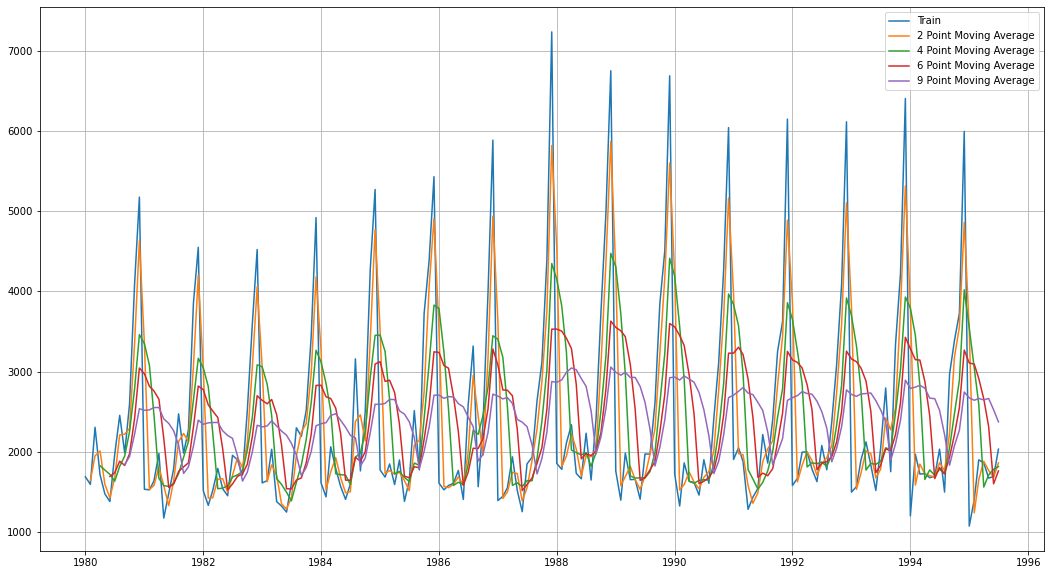

In [79]:
## Plotting on the whole data
plt.figure(figsize = (18, 10))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

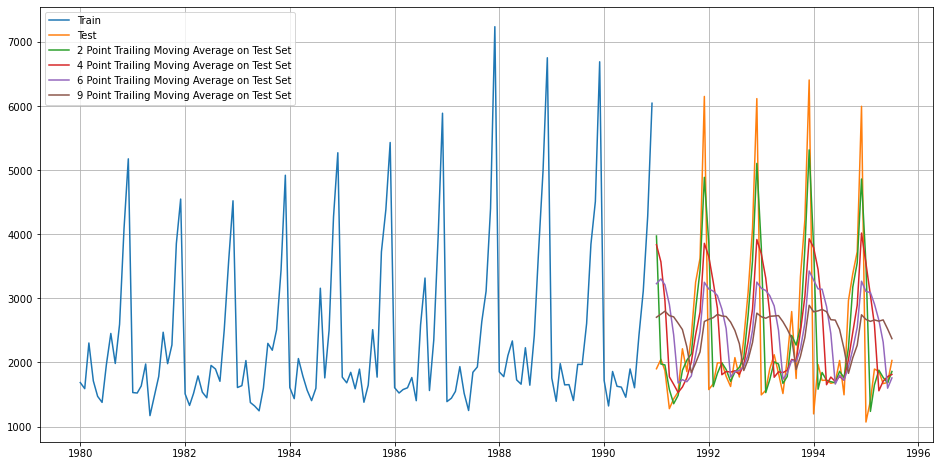

In [81]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [82]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [83]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_4])
resultsDf2

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


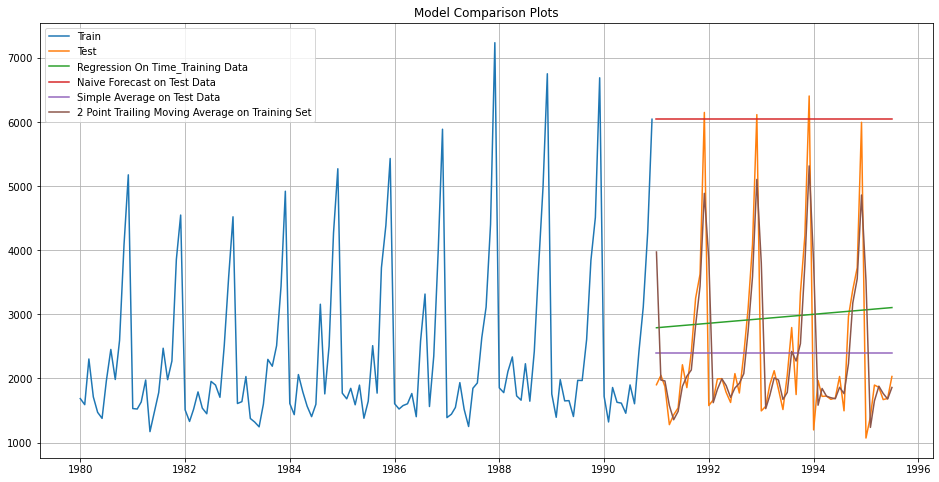

In [84]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
dftest = adfuller(sparkling,regression='ct')
print('sparkling test statistic is %3.3f' %dftest[0])
print('sparkling test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

sparkling test statistic is -1.798
sparkling test p-value is 0.7055958459932035
Number of lags used 12


In [87]:
dftest = adfuller(sparkling.diff().dropna(),regression='ct')
print('sparkling test statistic is %3.3f' %dftest[0])
print('sparkling test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

sparkling test statistic is -44.912
sparkling test p-value is 0.0
Number of lags used 10


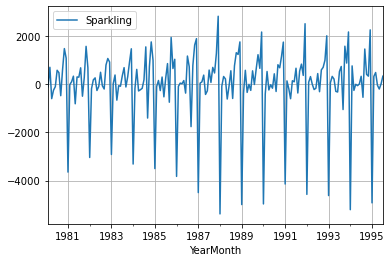

In [88]:
sparkling.diff().dropna().plot(grid=True);

In [89]:
diff = sparkling.diff().dropna()
diff

,Sparkling
YearMonth,
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0
1980-06-01,-94.0
...,...
1995-03-01,495.0
1995-04-01,-35.0
1995-05-01,-192.0


# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Building Automated ARIMA model

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

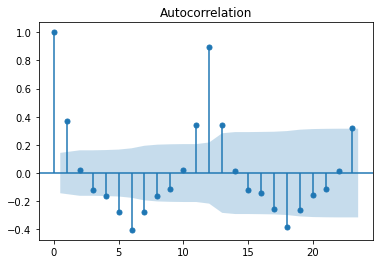

In [91]:
plot_acf(sparkling,alpha=0.05);

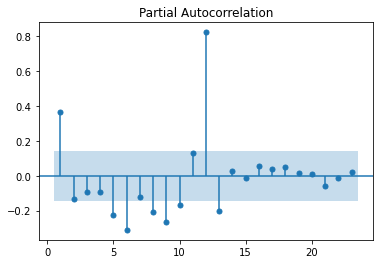

In [92]:
plot_pacf(sparkling,zero=False,alpha=0.05,method='ywmle');

check for stationarity on training data set

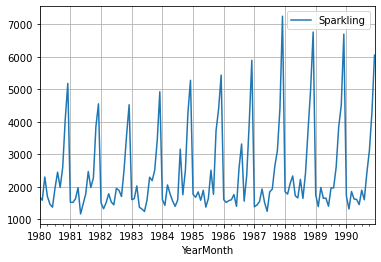

In [93]:
train.plot(grid=True);

In [94]:
dftest = adfuller(train,regression='ct')
print('sparkling test statistic is %3.3f' %dftest[0])
print('sparkling test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

sparkling test statistic is -2.062
sparkling test p-value is 0.5674110388593696
Number of lags used 12


In [95]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('sparkling test statistic is %3.3f' %dftest[0])
print('sparkling test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

sparkling test statistic is -7.968
sparkling test p-value is 8.479210655516242e-11
Number of lags used 11


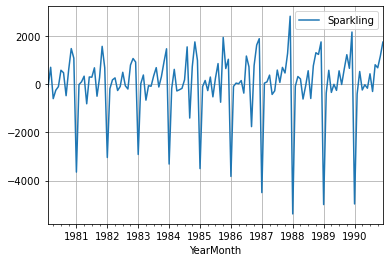

In [96]:
train.diff().dropna().plot(grid=True);

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [98]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [99]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [100]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.9948577476116
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004519366
ARIMA(1, 1, 3) - AIC:2235.6078101124103
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.50921703971


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2232.983057575394
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989865071907


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(3, 1, 2) - AIC:2230.7572943437854
ARIMA(3, 1, 3) - AIC:2221.4519770502657


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [101]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509217
15,"(3, 1, 3)",2221.451977
14,"(3, 1, 2)",2230.757294
11,"(2, 1, 3)",2232.983058
9,"(2, 1, 1)",2233.777626


In [102]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Jul 2021   AIC                           2213.509
Time:                        17:23:03   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

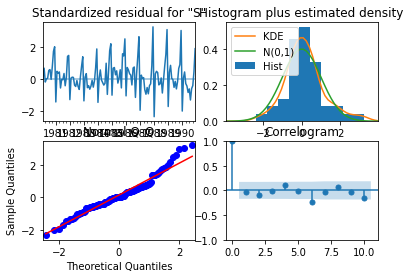

In [103]:
results_auto_ARIMA.plot_diagnostics();

In [104]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [105]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [106]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
#mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse)

RMSE: 1299.980372953183


In [107]:
resultsDf3 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2,1,2) - Auto'])

resultsDf3

,Test RMSE
"ARIMA(2,1,2) - Auto",1299.980373


Building Automated SARIMA model

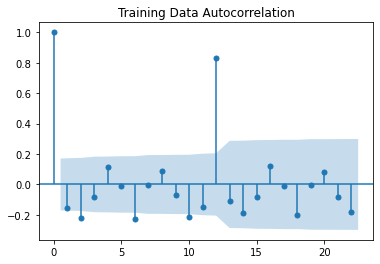

In [108]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [109]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 4)
Model: (0, 1, 2)(0, 0, 2, 4)
Model: (0, 1, 3)(0, 0, 3, 4)
Model: (1, 1, 0)(1, 0, 0, 4)
Model: (1, 1, 1)(1, 0, 1, 4)
Model: (1, 1, 2)(1, 0, 2, 4)
Model: (1, 1, 3)(1, 0, 3, 4)
Model: (2, 1, 0)(2, 0, 0, 4)
Model: (2, 1, 1)(2, 0, 1, 4)
Model: (2, 1, 2)(2, 0, 2, 4)
Model: (2, 1, 3)(2, 0, 3, 4)
Model: (3, 1, 0)(3, 0, 0, 4)
Model: (3, 1, 1)(3, 0, 1, 4)
Model: (3, 1, 2)(3, 0, 2, 4)
Model: (3, 1, 3)(3, 0, 3, 4)


In [110]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [111]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:2185.7939935631935
SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:2088.427634733843
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:1959.5422324270423
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:2202.19571994411
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:2154.1896543009007
SARIMA(0, 1, 0)x(1, 0, 2, 4) - AIC:2027.895879671198
SARIMA(0, 1, 0)x(1, 0, 3, 4) - AIC:1958.5224764981792
SARIMA(0, 1, 0)x(2, 0, 0, 4) - AIC:2137.78745529835
SARIMA(0, 1, 0)x(2, 0, 1, 4) - AIC:2094.385954683517
SARIMA(0, 1, 0)x(2, 0, 2, 4) - AIC:2025.6386634728894
SARIMA(0, 1, 0)x(2, 0, 3, 4) - AIC:1929.115928394451
SARIMA(0, 1, 0)x(3, 0, 0, 4) - AIC:1840.8333361960124
SARIMA(0, 1, 0)x(3, 0, 1, 4) - AIC:1842.7655681782226
SARIMA(0, 1, 0)x(3, 0, 2, 4) - AIC:1840.8469056204253
SARIMA(0, 1, 0)x(3, 0, 3, 4) - AIC:1803.3374776123956
SARIMA(0, 1, 1)x(0, 0, 0, 4) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:2166.483551978703
SARIMA(0, 1, 1)x(0, 0, 2, 4) - AIC:20

SARIMA(2, 1, 1)x(2, 0, 1, 4) - AIC:2026.5350120247313
SARIMA(2, 1, 1)x(2, 0, 2, 4) - AIC:1989.3104358382818
SARIMA(2, 1, 1)x(2, 0, 3, 4) - AIC:1830.443927366906
SARIMA(2, 1, 1)x(3, 0, 0, 4) - AIC:1762.8760945588924
SARIMA(2, 1, 1)x(3, 0, 1, 4) - AIC:1798.1328823235126
SARIMA(2, 1, 1)x(3, 0, 2, 4) - AIC:1766.1447217104878
SARIMA(2, 1, 1)x(3, 0, 3, 4) - AIC:1740.1846020512066
SARIMA(2, 1, 2)x(0, 0, 0, 4) - AIC:2176.8681144920774
SARIMA(2, 1, 2)x(0, 0, 1, 4) - AIC:2103.737407707851
SARIMA(2, 1, 2)x(0, 0, 2, 4) - AIC:2012.1347997423181
SARIMA(2, 1, 2)x(0, 0, 3, 4) - AIC:1893.8983262246793
SARIMA(2, 1, 2)x(1, 0, 0, 4) - AIC:2128.8661980755423
SARIMA(2, 1, 2)x(1, 0, 1, 4) - AIC:2074.70525341765
SARIMA(2, 1, 2)x(1, 0, 2, 4) - AIC:1968.4308014239277
SARIMA(2, 1, 2)x(1, 0, 3, 4) - AIC:1893.0949389131079
SARIMA(2, 1, 2)x(2, 0, 0, 4) - AIC:2074.5770710777697
SARIMA(2, 1, 2)x(2, 0, 1, 4) - AIC:2024.213146195054
SARIMA(2, 1, 2)x(2, 0, 2, 4) - AIC:1974.4956790978117
SARIMA(2, 1, 2)x(2, 0, 3, 4) - AI

In [112]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
63,"(0, 1, 3)","(3, 0, 3, 4)",1710.552848
127,"(1, 1, 3)","(3, 0, 3, 4)",1711.542457
191,"(2, 1, 3)","(3, 0, 3, 4)",1714.121986
255,"(3, 1, 3)","(3, 0, 3, 4)",1714.727577
251,"(3, 1, 3)","(2, 0, 3, 4)",1714.874679


In [113]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0, 1, 3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(3, 0, 3, 4)   Log Likelihood                -845.276
Date:                           Sun, 25 Jul 2021   AIC                           1710.553
Time:                                   17:26:16   BIC                           1738.002
Sample:                               01-01-1980   HQIC                          1721.694
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7687      0.100     -7.685      0.000      -0.965      -0.573
ma.L2         -0.1863      0.161     -1.154

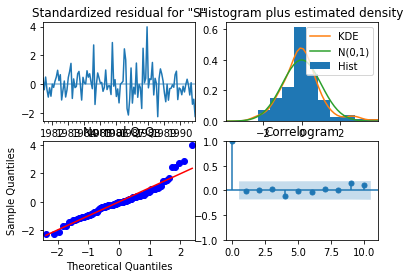

In [114]:
results_auto_SARIMA.plot_diagnostics();

In [115]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [116]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1435.653654,362.183892,725.786269,2145.521039
1991-02-01,1311.450951,371.760128,582.814488,2040.087413
1991-03-01,1657.997337,372.109091,928.676922,2387.317753
1991-04-01,1571.799568,376.241363,834.380047,2309.219088
1991-05-01,1382.238793,376.671598,643.976027,2120.501559


In [117]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
#mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse)

RMSE: 564.9245400909168


In [118]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(0,1,3)(3,0,3,4) - Auto'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,2) - Auto",1299.980373
"SARIMA(0,1,3)(3,0,3,4) - Auto",564.924540


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

BUILDING ARIMA MODEL MANUALLY BASIS CUT OFF FROM ACF AND PACF PLOTS

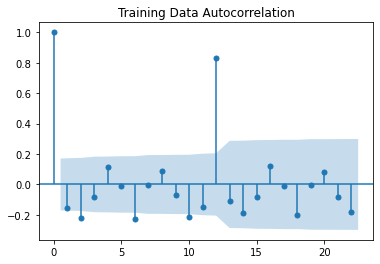

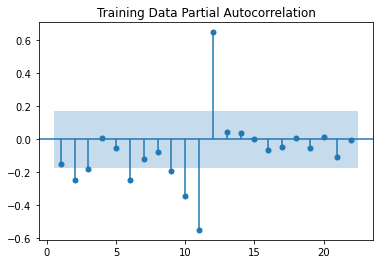

In [119]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [120]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 25 Jul 2021   AIC                           2267.663
Time:                        17:26:17   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


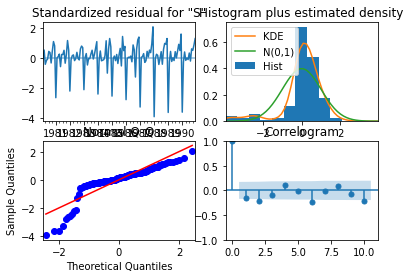

In [121]:
results_manual_ARIMA.plot_diagnostics();

In [122]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
#mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse)

RMSE: 3864.2793518443914


In [124]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(0,1,0)- Manual'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,2) - Auto",1299.980373
"SARIMA(0,1,3)(3,0,3,4) - Auto",564.924540
"ARIMA(0,1,0)- Manual",3864.279352


BUILDING SARIMA MODEL MANUALLY BASIS CUT OFF FROM ACF AND PACF PLOTS

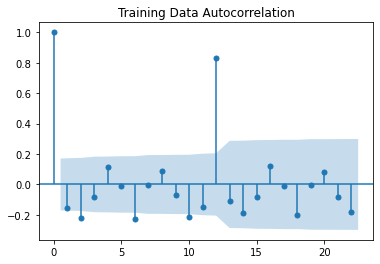

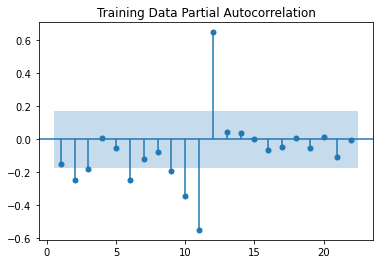

In [125]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [126]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(4, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(4, 0, [1, 2, 3], 4)   Log Likelihood                -873.204
Date:                                   Sun, 25 Jul 2021   AIC                           1762.408
Time:                                           17:26:18   BIC                           1784.368
Sample:                                       01-01-1980   HQIC                          1771.321
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.1454      0.197     -0.739      0.460    

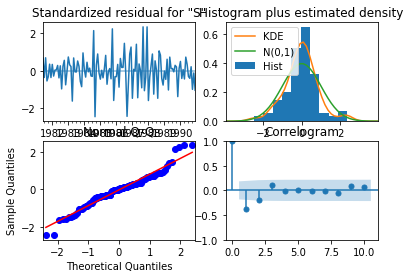

In [127]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [128]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [129]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
#mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse)

RMSE: 1286.3607474950072


In [130]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(4,0,3,4) - Manual'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,2) - Auto",1299.980373
"SARIMA(0,1,3)(3,0,3,4) - Auto",564.924540
"ARIMA(0,1,0)- Manual",3864.279352
"SARIMA(0,1,0)(4,0,3,4) - Manual",1286.360747


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [131]:
pd.concat([resultsDf1,resultsDf2,resultsDf3])

,Test RMSE
Single ES,1338.012144
Double ES,3949.993290
Triple ES - Additive,379.695686
Triple ES - Multiplicative,406.510170
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

# Building the most optimum model on the Full Data.

In [132]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling['Sparkling'],
                                order=(0,1,3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 3)x(3, 0, 3, 4)   Log Likelihood               -1247.533
Date:                           Sun, 25 Jul 2021   AIC                           2515.066
Time:                                   17:26:20   BIC                           2546.424
Sample:                               01-01-1980   HQIC                          2527.790
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8199      0.076    -10.849      0.000      -0.968      -0.672
ma.L2         -0.1512      0.117     -1.293

In [133]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [134]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(12)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1823.680700,361.616287,1114.925800,2532.435599
1995-09-01,2533.134169,367.439083,1812.966799,3253.301539
1995-10-01,3236.379330,367.573919,2515.947686,3956.810973
1995-11-01,4079.101814,369.204629,3355.474039,4802.729589
1995-12-01,6291.856778,369.371093,5567.902738,7015.810818
1996-01-01,1269.892214,370.302726,544.112208,1995.672220
1996-02-01,1506.922059,371.792373,778.222399,2235.621719
1996-03-01,1908.648694,373.021956,1177.539096,2639.758293
1996-04-01,1868.479086,373.553288,1136.328095,2600.630076
1996-05-01,1670.792491,374.144943,937.481877,2404.103105


In [136]:
rmse = mean_squared_error(sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 530.5186668518359


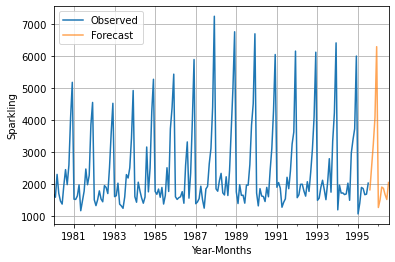

In [137]:
axis = sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

Building model using triple explonential smoothing

In [135]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
TES = ExponentialSmoothing(sparkling,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
TES = TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07596713833847582, 'smoothing_trend': 0.03256922042142542, 'smoothing_seasonal': 0.37660763013263704, 'damping_trend': nan, 'initial_level': 2356.500976792558, 'initial_trend': -1.0362742462267969, 'initial_seasons': array([-636.25317961, -723.00028675, -398.67051497, -473.45456398,
       -808.43195611, -815.36867317, -384.24769271,   72.9999949 ,
       -237.46126013,  272.34548254, 1541.39087625, 2590.11216133]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [140]:
forecast = TES.forecast(12)
forecast

1995-08-01    1877.418973
1995-09-01    2405.272289
1995-10-01    3242.091582
1995-11-01    3922.174721
1995-12-01    6118.486885
1996-01-01    1262.602775
1996-02-01    1592.120997
1996-03-01    1831.635313
1996-04-01    1806.451718
1996-05-01    1651.704099
1996-06-01    1586.487882
1996-07-01    1976.989421
Freq: MS, dtype: float64

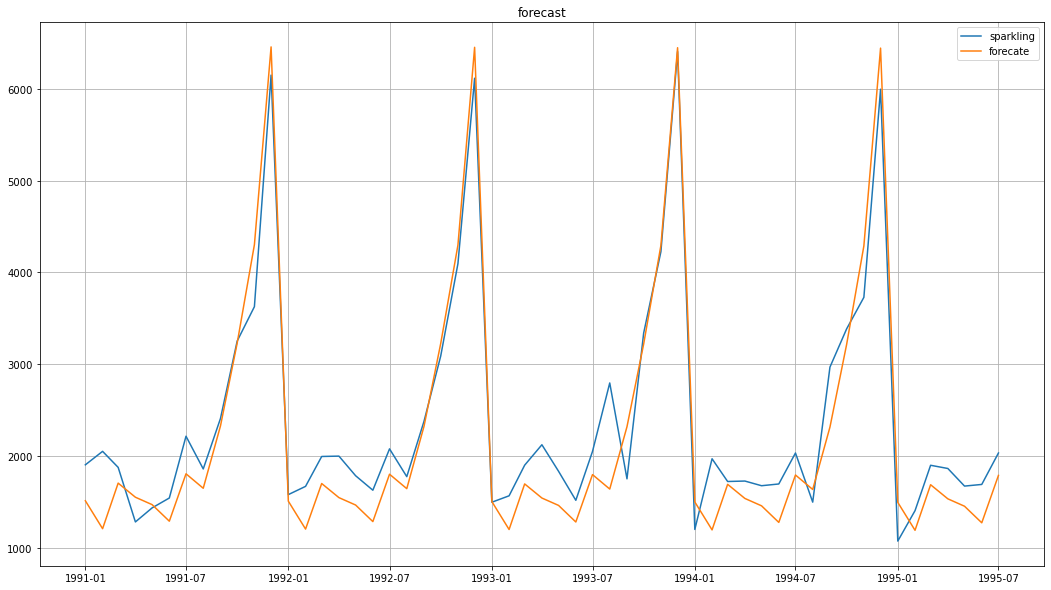

In [146]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
#plt.plot(train, label='Train')
plt.plot(test, label='sparkling')

#plt.plot(SES_predict, label='Single ES')
#plt.plot(DES_predict, label='Double ES')
plt.plot(TES_predict, label='forecate')
#plt.plot(TES_predict_am, label='Triple ES -- Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('forecast');

#                                                END